In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [53]:
dataset ,dataset_info = tfds.load('malaria',with_info =True)

In [54]:
dataset

{'train': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [55]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [56]:
for data in dataset['train'].take(1):
  print(data)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


In [57]:
# def data_splits(dataset,train_r,val_r,test_r):
#   dataset_size = len(dataset);

#   train_dataset = dataset.take(int(train_r*dataset_size))
#   val_test_dataset = dataset.skip(int(train_r*dataset_size))
#   val_dataset = val_test_dataset.take(int(val_r*dataset_size))
#   test_dataset = val_test_dataset.skip(int(val_r*dataset_size))

#   return train_dataset,val_dataset,test_dataset

In [58]:
# TRAIN_R = 0.8
# TEST_R = 0.1
# VAL_R = 0.1

# datasets = tf.data.Dataset.range(10)
# train_d ,val_d,test_d = data_splits(dataset,TRAIN_R,VAL_R,TEST_R)
# print(list(train_d.as_numpy_iterator()))
# print(list(val_d.as_numpy_iterator()))
# print(list(test_d.as_numpy_iterator()))

In [59]:
# TRAIN_R = 0.8
# TEST_R = 0.1
# VAL_R = 0.1
# train_d ,val_d,test_d = data_splits(dataset['train'],TRAIN_R,VAL_R,TEST_R)
# print(list(train_d.take(1).as_numpy_iterator()))
# print(list(val_d.take(1).as_numpy_iterator()))
# print(list(test_d.take(1).as_numpy_iterator()))

Data visualizations

In [60]:
# prompt: using train _test split method split the dataset into train test and validation

train_dataset, test_dataset, validation_dataset = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True,
    shuffle_files=False,
)


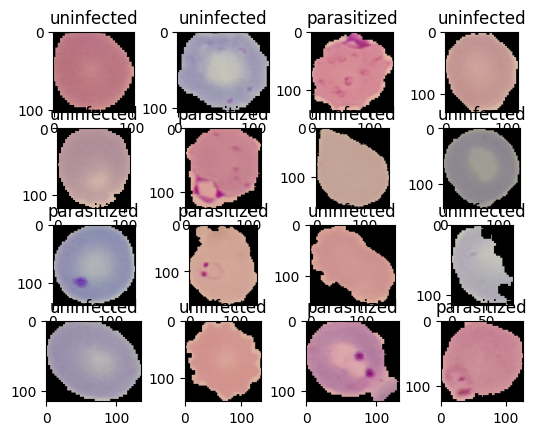

In [61]:
for i ,(image,label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))

Data preprocessing

In [62]:
IM_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0,label

In [63]:
train_dataset = train_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)
validation_dataset = validation_dataset.map(resize_rescale)

In [64]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [65]:
Batch_Size =32
train_dataset = train_dataset.shuffle(buffer_size =8 ,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [66]:
Batch_Size =32
validation_dataset = validation_dataset.shuffle(buffer_size =8 ,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [67]:
Batch_Size =32
test_dataset = test_dataset.shuffle(buffer_size =8 ,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [68]:
# from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense,Flatten,InputLayer

# lenet_model = tf.keras.Sequential([
#        InputLayer(input_shape = (224,224,3)),
#        Conv2D(filters = 6,kernel_size = 5,strides =1, padding= 'valid',activation='sigmoid'),
#        MaxPool2D(pool_size = 2,strides = 2),
#        Conv2D(filters = 16,kernel_size = 5,strides =1, padding= 'valid',activation='sigmoid'),
#        MaxPool2D(pool_size = 2,strides = 2),

#        Flatten(),
#        Dense(1000,activation = 'sigmoid'),
#        Dense(10,activation = 'sigmoid'),
#        Dense(1,activation = 'sigmoid'),

# ])
# lenet_model.summary()

In [69]:
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization

update_model = tf.keras.Sequential([
       InputLayer(input_shape = (224,224,3)),
       Conv2D(filters = 6,kernel_size = 5,strides =1, padding= 'valid',activation='relu'),
       BatchNormalization(),
       MaxPool2D(pool_size = 2,strides = 2),
       Conv2D(filters = 16,kernel_size = 5,strides =1, padding= 'valid',activation='relu'),
       BatchNormalization(),
       MaxPool2D(pool_size = 2,strides = 2),

       Flatten(),
       Dense(1000,activation = 'relu'),
       BatchNormalization(),
       Dense(10,activation = 'relu'),
       BatchNormalization(),
       Dense(1,activation = 'sigmoid'),

])
update_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_10 (Ba  (None, 220, 220, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 110, 110, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_11 (Ba  (None, 106, 106, 16)      64        
 tchNormalization)                                               
                                                      

In [70]:
y_true = [0.8,0.6,0.2]
y_pred = [0.9,0.4,0.8]
bce = tf.keras.losses.BinaryCrossentropy(from_logits = True)  # by defult from_digits = False (means our output not lies from 0 to 1)
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.73508996>

In [74]:
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError,BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
update_model.compile(optimizer= Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
                    metrics = 'accuracy'


              )

In [76]:
history = update_model.fit(train_dataset,validation_data = validation_dataset,epochs = 5,verbose = 1)

Epoch 1/5
689/689 [==============================] - 50s 73ms/step - loss: 0.2423 - accuracy: 0.9218 - val_loss: 0.2836 - val_accuracy: 0.9082
Epoch 2/5
689/689 [==============================] - 39s 57ms/step - loss: 0.2037 - accuracy: 0.9364 - val_loss: 0.3466 - val_accuracy: 0.9122
Epoch 3/5
689/689 [==============================] - 38s 54ms/step - loss: 0.3789 - accuracy: 0.8290 - val_loss: 0.8498 - val_accuracy: 0.8052
Epoch 4/5
689/689 [==============================] - 40s 58ms/step - loss: 0.2080 - accuracy: 0.9316 - val_loss: 0.5254 - val_accuracy: 0.9300
Epoch 5/5
689/689 [==============================] - 39s 57ms/step - loss: 0.1911 - accuracy: 0.9382 - val_loss: 0.2181 - val_accuracy: 0.9394


In [77]:
update_model.evaluate(test_dataset)

87/87 [==============================] - 7s 81ms/step - loss: 17.0109 - accuracy: 0.9300


[17.01088523864746, 0.9299709796905518]

In [78]:
def parasite_or_not(x):
  if(x<0.5):
    return str('p')
  else:
    return str('u')


1/1 [==============================] - 0s 29ms/step


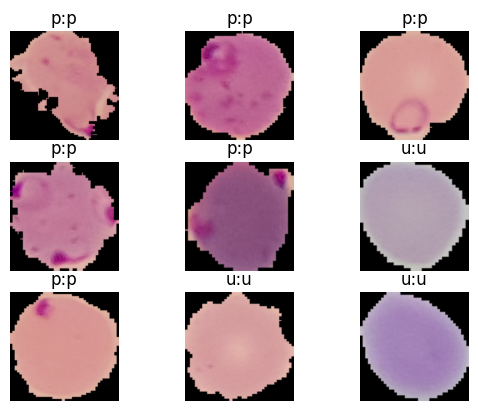

In [79]:
for i ,(image,label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ':'+str(parasite_or_not(update_model.predict(image)[0][0])))
  plt.axis('off')

Model saving using Gdrive

In [80]:
update_model.save('Malaria')

In [82]:
malaria_model = tf.keras.models.load_model('Malaria')
malaria_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_10 (Ba  (None, 220, 220, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 110, 110, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_11 (Ba  (None, 106, 106, 16)      64        
 tchNormalization)                                               
                                                      

In [83]:
update_model.save("Malaria.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


saving only weights

In [84]:
update_model.save_weights("weights/lenet_weights")

In [ ]:
update

In [86]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
!cp -r /content/Malaria/ /content/drive/MyDrive/Malaria_colab/